In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Q1

In [1]:
dic = {'Boys': [72, 68, 70, 69, 74], 'Girls': [63, 65, 69, 62, 61]}

In [2]:
arr = [{'Boys': dic['Boys'][i], 'Girls': dic['Girls'][i]} for i in range(len(dic['Boys']))]
arr

[{'Boys': 72, 'Girls': 63},
 {'Boys': 68, 'Girls': 65},
 {'Boys': 70, 'Girls': 69},
 {'Boys': 69, 'Girls': 62},
 {'Boys': 74, 'Girls': 61}]

## Q2

In [6]:
arr = np.random.randint(1, 100, size=(4, 4))
arr

array([[69, 79, 98, 80],
       [43, 31, 77, 44],
       [37, 94,  8, 83],
       [30, 81, 69, 67]])

In [7]:
arr.mean(axis=1)

array([81.5 , 48.75, 55.5 , 61.75])

In [9]:
arr.std(axis=1)

array([10.45227248, 17.09349291, 34.7742721 , 19.09679292])

In [10]:
arr.var(axis=1)

array([ 109.25  ,  292.1875, 1209.25  ,  364.6875])

In [14]:
B = [56, 48, 22, 41, 78, 91, 24, 46, 8, 33]

np.argsort(B)

array([8, 2, 6, 9, 3, 7, 1, 0, 4, 5], dtype=int64)

In [15]:
m, n = np.random.randint(1, 4), np.random.randint(1, 4)

arr = np.random.randint(0, 100, (m, n))
arr

array([[85, 18],
       [42, 27],
       [49, 64]])

In [16]:
arr.shape

(3, 2)

In [17]:
arr.dtype

dtype('int32')

In [18]:
arr.reshape(n, m)

array([[85, 18, 42],
       [27, 49, 64]])

## Q3

In [2]:
df = pd.DataFrame(np.random.randint(1, 100, (50, 3)), columns = list('ABC'))
df.head()

,A,B,C
0,77,29,6
1,21,60,46
2,86,55,22
3,60,4,41
4,36,45,9


In [3]:
for i in range(df.size // 10):
    x, y = np.random.randint(0, 50), np.random.randint(0, 3)
    df.iloc[x, y] = np.nan

In [4]:
df.isnull().sum()

A    5
B    3
C    6
dtype: int64

In [43]:
df.dropna(thresh=len(df['A'])-5, axis=1, inplace=True)
df

,A,B
0,43.0,56.0
1,14.0,95.0
2,61.0,40.0
3,14.0,NaN
4,51.0,29.0
5,28.0,96.0
6,86.0,19.0
7,39.0,72.0
8,88.0,53.0
9,55.0,7.0


In [16]:
df.iloc[2, 1] = 1000
df.iloc[3, 0] = -1000

In [17]:
q3 = df.describe().loc['75%', :]
q1 = df.describe().loc['25%', :]

In [18]:
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [19]:
df[~((df > upper) | (df < lower)).any(1)].head()

,A,B,C
0,77.0,NaN,6.0
1,21.0,60.0,46.0
4,NaN,45.0,9.0
5,25.0,72.0,NaN
6,94.0,30.0,69.0


In [46]:
df.drop(df.apply(np.sum, axis=1).idxmax())

,A,B
0,43.0,56.0
1,14.0,95.0
2,61.0,40.0
3,14.0,NaN
4,51.0,29.0
5,28.0,96.0
6,86.0,19.0
7,39.0,72.0
8,88.0,53.0
9,55.0,7.0


In [47]:
df.sort_values(df.columns[0])

,A,B
39,1.0,88.0
24,4.0,39.0
42,5.0,17.0
48,6.0,93.0
40,8.0,7.0
45,11.0,99.0
29,11.0,36.0
1,14.0,95.0
3,14.0,NaN
18,15.0,78.0


In [50]:
df['A'] = df['A'].drop_duplicates()
df

,A,B
0,43.0,56.0
1,14.0,95.0
2,61.0,40.0
3,NaN,NaN
4,51.0,29.0
5,28.0,96.0
6,86.0,19.0
7,39.0,72.0
8,88.0,53.0
9,55.0,7.0


In [56]:
df['A'].corr(df['B'])

-0.20128417102975452

In [54]:
df['B'].cov(df['A'])

-172.44096728307258

In [58]:
bins = pd.cut(df['B'], 5)
bins

0      (40.8, 60.2]
1      (79.6, 99.0]
2      (21.4, 40.8]
3               NaN
4      (21.4, 40.8]
5      (79.6, 99.0]
6     (1.903, 21.4]
7      (60.2, 79.6]
8      (40.8, 60.2]
9     (1.903, 21.4]
10     (21.4, 40.8]
11     (40.8, 60.2]
12              NaN
13     (40.8, 60.2]
14     (79.6, 99.0]
15              NaN
16     (21.4, 40.8]
17    (1.903, 21.4]
18     (60.2, 79.6]
19     (79.6, 99.0]
20     (60.2, 79.6]
21     (40.8, 60.2]
22     (40.8, 60.2]
23     (21.4, 40.8]
24     (21.4, 40.8]
25     (60.2, 79.6]
26     (79.6, 99.0]
27     (21.4, 40.8]
28     (79.6, 99.0]
29     (21.4, 40.8]
30     (60.2, 79.6]
31     (21.4, 40.8]
32     (21.4, 40.8]
33     (79.6, 99.0]
34              NaN
35     (60.2, 79.6]
36     (79.6, 99.0]
37    (1.903, 21.4]
38    (1.903, 21.4]
39     (79.6, 99.0]
40    (1.903, 21.4]
41     (21.4, 40.8]
42    (1.903, 21.4]
43     (21.4, 40.8]
44     (60.2, 79.6]
45     (79.6, 99.0]
46     (21.4, 40.8]
47              NaN
48     (79.6, 99.0]
49     (60.2, 79.6]


## Q5

In [59]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [60]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [62]:
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target

In [63]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
iris['species'] = iris_data.target_names[iris.species]

In [65]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
sns.set()

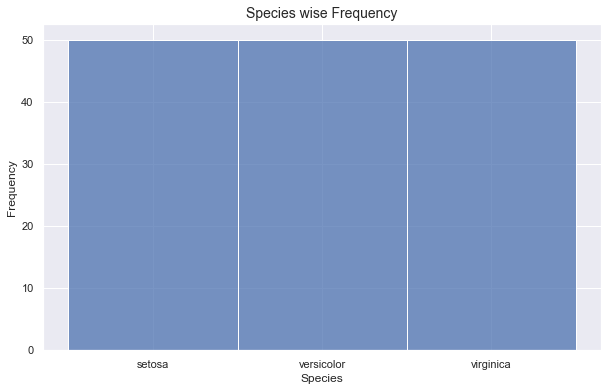

In [69]:
plt.figure(figsize=(10, 6))

sns.histplot(iris.species)

plt.title('Species wise Frequency', fontsize=14)
plt.xlabel('Species')
plt.ylabel('Frequency')

plt.show()

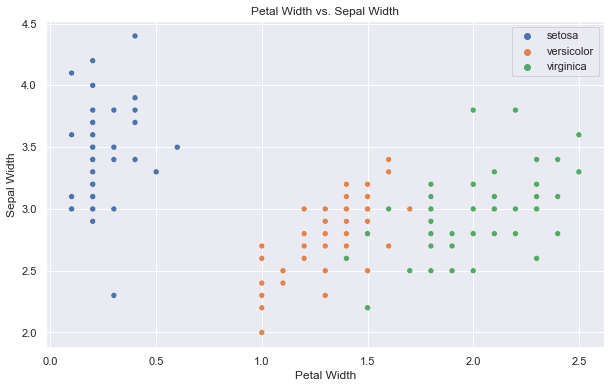

In [82]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=iris, x='petal width (cm)', y='sepal width (cm)', hue='species')

plt.title('Petal Width vs. Sepal Width')
plt.xlabel("Petal Width")
plt.ylabel("Sepal Width")
plt.legend()

plt.show()

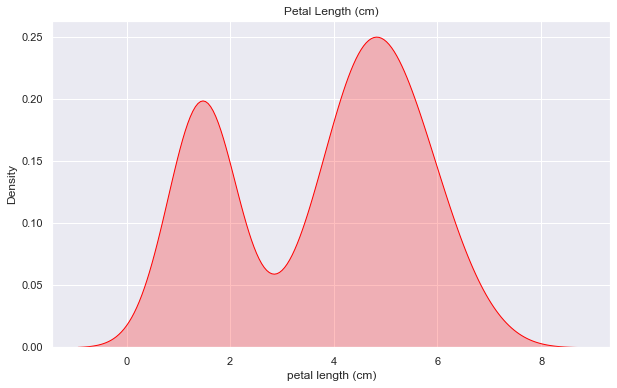

In [75]:
plt.figure(figsize=(10, 6))

sns.kdeplot(iris['petal length (cm)'], shade=True, color='red')

plt.title('Petal Length (cm)')

plt.show()

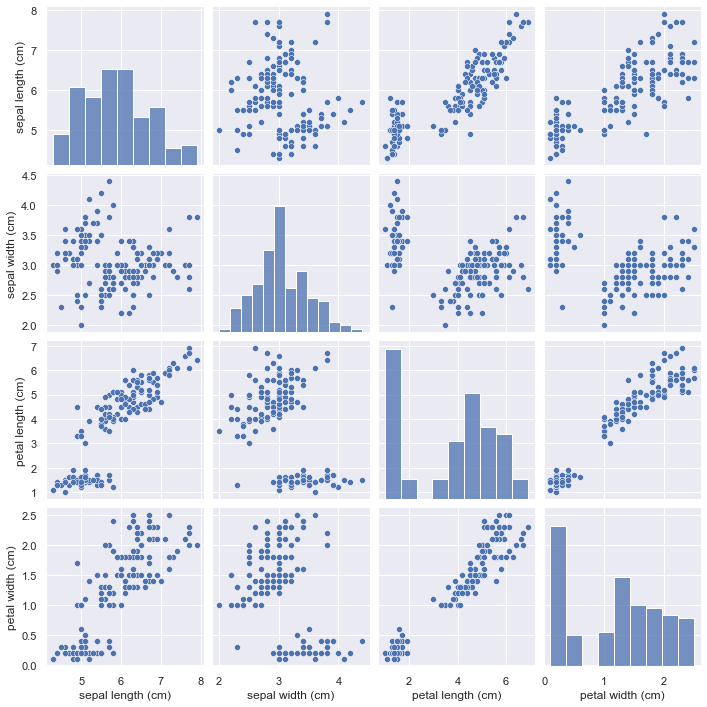

In [76]:
sns.pairplot(iris)

plt.show()

## Q8

In [83]:
df = pd.read_csv('./families.csv')

In [84]:
df.head()

,Name,Gender,MonthlyIncome
0,Shah,Male,114000.0
1,Vats,Male,65000.0
2,Vats,Female,43150.0
3,Kumar,Female,69500.0
4,Vats,Female,155000.0


In [85]:
df.groupby('Name').mean('MonthlyIncome')

,MonthlyIncome
Name,
Kumar,84510.0
Shah,93800.0
Vats,83762.5


In [86]:
df.groupby("Name").max()

,Gender,MonthlyIncome
Name,,
Kumar,Male,103000.0
Shah,Male,114000.0
Vats,Male,155000.0


In [87]:
df[df['MonthlyIncome'] > 60000]

,Name,Gender,MonthlyIncome
0,Shah,Male,114000.0
1,Vats,Male,65000.0
3,Kumar,Female,69500.0
4,Vats,Female,155000.0
5,Kumar,Male,103000.0
7,Shah,Female,112400.0
8,Kumar,Female,81030.0
9,Vats,Male,71900.0


In [89]:
df.query('Gender == "Female" & Name == "Shah"')['MonthlyIncome'].mean()

112400.0

## Q6

In [50]:
df = pd.read_csv("./sales.csv", parse_dates=True)
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2020-01-01,0,25,2552,899.00,1
1,2020-01-02,0,25,2552,899.00,-1
2,2020-01-03,0,25,2554,1709.05,1
3,2020-01-04,0,25,2555,1099.00,1
4,2020-01-05,0,25,2564,349.00,1
5,2020-01-06,0,25,2565,549.00,1
6,2020-01-07,0,25,2572,239.00,1
7,2020-01-08,0,25,2572,299.00,1
8,2020-01-09,0,25,2573,299.00,3
9,NaN,0,25,2574,399.00,2


In [51]:
df.date = pd.date_range(start='2020-01-01', periods=49, freq='D')

In [52]:
for i in range(4):
    randX = np.random.randint(0, 49)
    df.loc[randX, 'date'] = np.nan

In [53]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2020-01-01,0,25,2552,899.00,1
1,2020-01-02,0,25,2552,899.00,-1
2,2020-01-03,0,25,2554,1709.05,1
3,2020-01-04,0,25,2555,1099.00,1
4,NaT,0,25,2564,349.00,1
5,2020-01-06,0,25,2565,549.00,1
6,2020-01-07,0,25,2572,239.00,1
7,2020-01-08,0,25,2572,299.00,1
8,2020-01-09,0,25,2573,299.00,3
9,2020-01-10,0,25,2574,399.00,2


In [55]:
df.fillna(method="ffill", inplace=True)

In [56]:
df.set_index('date', drop=False, inplace=True)

In [57]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,,
2020-01-01,2020-01-01,0,25,2552,899.00,1
2020-01-02,2020-01-02,0,25,2552,899.00,-1
2020-01-03,2020-01-03,0,25,2554,1709.05,1
2020-01-04,2020-01-04,0,25,2555,1099.00,1
2020-01-04,2020-01-04,0,25,2564,349.00,1
2020-01-06,2020-01-06,0,25,2565,549.00,1
2020-01-07,2020-01-07,0,25,2572,239.00,1
2020-01-08,2020-01-08,0,25,2572,299.00,1
2020-01-09,2020-01-09,0,25,2573,299.00,3


In [58]:
df.resample('M').mean()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2020-01-31,0.0,25.0,2582.354839,678.032258,1.096774
2020-02-29,0.0,25.0,2699.388889,907.805556,1.055556


In [63]:
df.date.map(lambda x: x.strftime("%d %B, %Y"))

date
2020-01-01     01 January, 2020
2020-01-02     02 January, 2020
2020-01-03     03 January, 2020
2020-01-04     04 January, 2020
2020-01-04     04 January, 2020
2020-01-06     06 January, 2020
2020-01-07     07 January, 2020
2020-01-08     08 January, 2020
2020-01-09     09 January, 2020
2020-01-10     10 January, 2020
2020-01-11     11 January, 2020
2020-01-12     12 January, 2020
2020-01-13     13 January, 2020
2020-01-14     14 January, 2020
2020-01-15     15 January, 2020
2020-01-16     16 January, 2020
2020-01-17     17 January, 2020
2020-01-18     18 January, 2020
2020-01-19     19 January, 2020
2020-01-20     20 January, 2020
2020-01-21     21 January, 2020
2020-01-22     22 January, 2020
2020-01-22     22 January, 2020
2020-01-24     24 January, 2020
2020-01-25     25 January, 2020
2020-01-26     26 January, 2020
2020-01-27     27 January, 2020
2020-01-28     28 January, 2020
2020-01-29     29 January, 2020
2020-01-30     30 January, 2020
2020-01-31     31 January, 2020
202